<a href="https://colab.research.google.com/github/NasrinGitHub/02-KaggleProjs/blob/main/IMDB_Review_SentimentAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

import pickle
import gensim

# Using CountVectorizer and RandomForest

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rawData = pd.read_csv("IMDB_Dataset.csv")
df = pd.read_csv("IMDB_Dataset.csv",engine="python", on_bad_lines='skip' )
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
dups= df[df.duplicated()].review
dups

3537     Quite what the producers of this appalling ada...
3769     My favourite police series of all time turns t...
4391     Beautiful film, pure Cassavetes style. Gena Ro...
6352     If you liked the Grinch movie... go watch that...
6479     I want very much to believe that the above quo...
                               ...                        
49912    This is an incredible piece of drama and power...
49950    This was a very brief episode that appeared in...
49984    Hello it is I Derrick Cannon and I welcome you...
49986    This movie is a disgrace to the Major League F...
49991    Les Visiteurs, the first movie about the medie...
Name: review, Length: 418, dtype: object

In [ ]:
#allDups = df[df["review"].isin(dups)]
#allDups.groupby("review")['sentiment'].apply(list)

In [ ]:
data = df.drop_duplicates()
data.shape

(49582, 2)

In [ ]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.nunique()

review       49582
sentiment        2
dtype: int64

In [ ]:
data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

X=data.drop('sentiment',axis=1)
y=data.drop('review', axis=1)

messages = X.copy()

### Dataset Preprocessing
lemmatizer=WordNetLemmatizer()

corpus = []
for i in range(0, len(messages)):
    review = re.sub("[^a-zA-Z]", " ", messages['review'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:

# Preprocess function to clean text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

data['review'] = corpus #data['review'].apply(preprocess_text)
reviews = data['review'].values
sentiments = data['sentiment'].values

# Convert sentiments to binary values
labels = np.array([1 if sentiment == 'positive' else 0 for sentiment in sentiments])

# Split the data
train_reviews, test_reviews, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#sentiment = []
#for l in data.sentiment:
 #   if l == "positive":
  #      sentiment.append(1)
   # elif l == "negative":
    #    sentiment.append(0)

#data['sentiment']= sentiment
#data.head()

#X=data.drop('sentiment',axis=1)
#y=data.drop('review', axis=1)
#X.head()

# Removing punctuations
#X.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Convertng headlines to lower case
#X["review"]=X["review"].str.lower()
#X.head()
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.3,shuffle=True)


In [ ]:
#train_reviews = []
for r in range(0,len(X_train.index)):
    #train_reviews.append(X_train.iloc[r,0])

#train_reviews

In [ ]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train_reviews)

In [ ]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
## Predict for the Test Dataset
test_reviews = []

for r in range(0,len(X_test.index)):
    test_reviews.append(X_test.iloc[r,0])

#test_reviews

In [ ]:
test_dataset = countvector.transform(test_reviews)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
## Import library to check accuracy
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[6258 1146]
 [1029 6442]]
0.853781512605042
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7404
           1       0.85      0.86      0.86      7471

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



# Using Tokenizer and Embedding layer

In [ ]:

# Step 2: Preprocess the Data
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Flatten

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.initializers import Constant
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm


In [ ]:
#data = pd.read_csv("IMDB_Dataset.csv",engine="python", on_bad_lines='skip' )

# Extract reviews and sentiments
#reviews = data['review'].values
#sentiments = data['sentiment'].values

# Convert sentiments to binary values (0 for negative, 1 for positive)
#sentiments = [1 if sentiment == 'positive' else 0 for sentiment in sentiments]

# Split the data into training and test sets
#train_reviews, test_reviews, train_labels, test_labels = train_test_split(reviews, sentiments, test_size=0.3, random_state=42)


In [ ]:

# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"


# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

# Tokenize and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_reviews)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [ ]:
# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Model definition
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
num_epochs = 5
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/5
1240/1240 [==============================] - 59s 44ms/step - loss: 0.3941 - accuracy: 0.8179 - val_loss: 0.3248 - val_accuracy: 0.8642
Epoch 2/5
1240/1240 [==============================] - 19s 15ms/step - loss: 0.2631 - accuracy: 0.8972 - val_loss: 0.3369 - val_accuracy: 0.8615
Epoch 3/5
1240/1240 [==============================] - 18s 14ms/step - loss: 0.2175 - accuracy: 0.9159 - val_loss: 0.3614 - val_accuracy: 0.8495
Epoch 4/5
1240/1240 [==============================] - 17s 13ms/step - loss: 0.1766 - accuracy: 0.9334 - val_loss: 0.4022 - val_accuracy: 0.8528
Epoch 5/5
1240/1240 [==============================] - 16s 13ms/step - loss: 0.1394 - accuracy: 0.9484 - val_loss: 0.4342 - val_accuracy: 0.8479


Total unique words: 101597
Most common words: [('br', 200425), ('movie', 87278), ('film', 79150), ('one', 53205), ('like', 39843), ('good', 29547), ('time', 24906), ('even', 24668), ('would', 24401), ('story', 22973)]


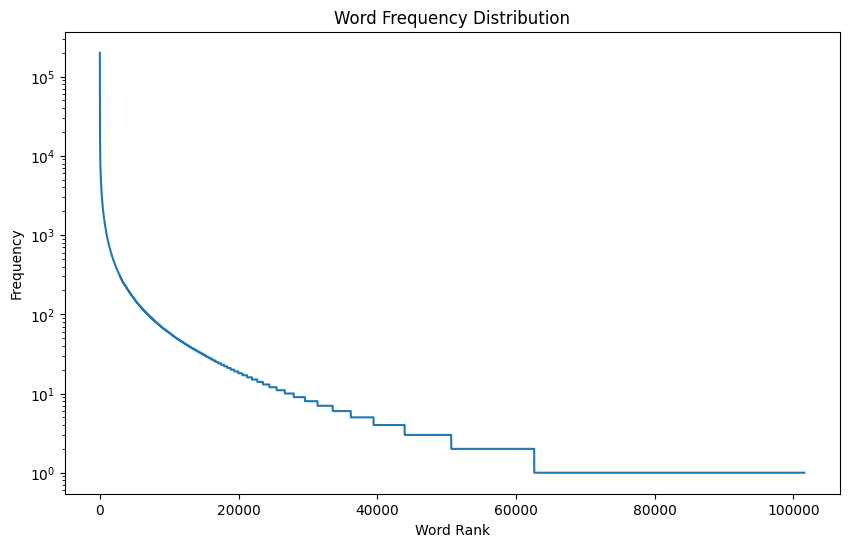

In [ ]:

# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

# Get word counts
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Analyze the word frequency
total_words = len(word_counts)
print(f"Total unique words: {total_words}")
print(f"Most common words: {sorted_word_counts[:10]}")

# Plot the word frequency distribution
word_freq = [count for word, count in sorted_word_counts]
plt.figure(figsize=(10, 6))
plt.plot(word_freq)
plt.yscale('log')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

# Using Word2Vec model and LSTM layer

In [ ]:
# Tokenize the reviews for Word2Vec
train_tokens = [review.split() for review in train_reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Create a word index dictionary
word_index = {word: index for index, word in enumerate(word2vec_model.wv.index_to_key)}

# Function to convert texts to sequences of word vectors
def text_to_sequence(text, word2vec_model, word_index, max_length):
    sequence = []
    for word in text.split():
        if word in word_index:
            sequence.append(word2vec_model.wv[word])
        else:
            sequence.append(np.zeros(word2vec_model.vector_size))
    if len(sequence) < max_length:
        sequence += [np.zeros(word2vec_model.vector_size)] * (max_length - len(sequence))
    else:
        sequence = sequence[:max_length]
    return np.array(sequence)

# Convert all reviews to sequences of word vectors
max_length = 100
train_sequences = np.array([text_to_sequence(review, word2vec_model, word_index, max_length) for review in train_reviews])
test_sequences = np.array([text_to_sequence(review, word2vec_model, word_index, max_length) for review in test_reviews])

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(max_length, word2vec_model.vector_size), return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_labels, epochs=10, batch_size=64, validation_data=(test_sequences, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, test_labels)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
620/620 [==============================] - 13s 14ms/step - loss: 0.4345 - accuracy: 0.8067 - val_loss: 0.3937 - val_accuracy: 0.8389
Epoch 2/10
620/620 [==============================] - 8s 12ms/step - loss: 0.3477 - accuracy: 0.8530 - val_loss: 0.3336 - val_accuracy: 0.8545
Epoch 3/10
620/620 [==============================] - 7s 12ms/step - loss: 0.3216 - accuracy: 0.8662 - val_loss: 0.3257 - val_accuracy: 0.8628
Epoch 4/10
620/620 [==============================] - 7s 12ms/step - loss: 0.3044 - accuracy: 0.8732 - val_loss: 0.3378 - val_accuracy: 0.8618
Epoch 5/10
620/620 [==============================] - 7s 12ms/step - loss: 0.2895 - accuracy: 0.8786 - val_loss: 0.3155 - val_accuracy: 0.8650
Epoch 6/10
620/620 [==============================] - 7s 12ms/step - loss: 0.2717 - accuracy: 0.8891 - val_loss: 0.3304 - val_accuracy: 0.8592
Epoch 7/10
620/620 [==============================] - 7s 12ms/step - loss: 0.2569 - accuracy: 0.8949 - val_loss: 0.3314 - val_accuracy: 0.869

# Fine tuning Word2Vec and using Bi-LSTM

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Unique words
VOC_SIZE = 50000

# Sentence Len
SEN_LEN = 1500

# Vector Size for each word
EMBED_DIM=300

# Test & Train size
TEST_SIZE = 0.3
EPOCHS = 5
BATCH_SIZE = 100

In [ ]:
X=data.drop('sentiment',axis=1)
y=data.drop('review', axis=1)

messages = X.copy()

In [ ]:
### Dataset Preprocessing
lemmatizer=WordNetLemmatizer()

corpus = []
for i in range(0, len(messages)):
    review = re.sub("[^a-zA-Z]", " ", messages['review'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

KeyError: 3537

In [ ]:
corpus = reviews

In [ ]:
def generate_word2vec_tokens(list_of_sentences):
  sentences = []
  for s in list_of_sentences:
    sentences.append(s.split())
  return sentences

def generate_word2vec(sentences):
  w2v_model=gensim.models.Word2Vec(sentences=sentences,vector_size=300,window=10,min_count=1)
  w2v_model.train(sentences,epochs=10,total_examples=len(sentences))
  return w2v_model

def save_word2vec(word2vec_model, model_name):
  word2vec_model.wv.save_word2vec_format(model_name, binary=True)

def load_word2vec(model_name):
  loaded_model = gensim.models.KeyedVectors.load_word2vec_format(model_name, binary=True)
  return loaded_model

In [ ]:
ss = generate_word2vec_tokens(corpus)
word2vec_model  = generate_word2vec(ss)


In [ ]:
save_word2vec(word2vec_model , 'word2vec.bin')

w2v_model = load_word2vec('word2vec.bin')

In [ ]:
def apply_tokenizer(data):
  tok = Tokenizer(num_words = VOC_SIZE)
  tok.fit_on_texts(data)
  encoded_data = tok.texts_to_sequences(data)
  return [tok, encoded_data]

def apply_padding(data):
  pad_data = pad_sequences(data, maxlen=SEN_LEN)
  print("New Dimensions: ", pad_data.shape)
  return pad_data

def generate_embedded_matrix(tok, w2v_model):
  embed_matrix=np.zeros(shape=(VOC_SIZE,EMBED_DIM))
  for word,i in tok.word_index.items():
    if i < VOC_SIZE and  word in w2v_model.key_to_index:
      embed_vector=w2v_model.get_vector(word)
      if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
        embed_matrix[i]=embed_vector
  return embed_matrix

In [ ]:
tok, encoded_corpus = apply_tokenizer(corpus)

embed_matrix = generate_embedded_matrix(tok, w2v_model)

pad_corpus = apply_padding(encoded_corpus)



New Dimensions:  (49582, 1500)


In [ ]:
X_final=pad_corpus
y_final= np.array(y)

In [ ]:
y_final
y["sentiment"].loc[y["sentiment"]=="positive"]=1.0
y["sentiment"].loc[y["sentiment"]=="negative"]=0.0
y_final = np.asarray(y).astype("float64")

In [ ]:
y_final

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
X_final.shape,y_final.shape

((49582, 1500), (49582, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=TEST_SIZE, random_state=42)

In [ ]:
# Create Model
def create_model(MODEL):
  model=Sequential()
  model.add(Embedding(input_dim=VOC_SIZE,output_dim=EMBED_DIM,input_length=SEN_LEN,embeddings_initializer=Constant(embed_matrix)))
  model.add(Dense(256))
  model.add(Dropout(0.05))
  model.add(MODEL)
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

# Train Model
def train_model(MODEL, x_train, y_train):
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
  # callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.0025)
  MODEL.fit(
      x_train,
      y_train,
      validation_split=0.1,
      epochs=EPOCHS,
      shuffle=True,
      batch_size=BATCH_SIZE
      ,callbacks=[earlystop]
  )

def generate_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)

  ax = plt.subplot()
  sns.set(font_scale=3.0) # Adjust to fit
  sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

  label_font = {'size':'18'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('True labels', fontdict=label_font);

  ax.set_title('Confusion Matrix', fontdict=label_font);

  ax.xaxis.set_ticklabels(['Real', 'Fake']);
  ax.yaxis.set_ticklabels(['Real', 'Fake']);
  plt.show()


def generate_classification_report(y_test, y_pred):
  print(classification_report(y_test,y_pred))

# Test Model
def test_model(MODEL, model_name, x_test, y_test):
  y_pred=MODEL.predict(x_test)
  y_pred=np.where(y_pred >= 0.5, 1,0)
  score = accuracy_score(y_pred,y_test)
  print('Model Accuracy: ',score)
  print("\n\n")
  generate_confusion_matrix(y_test, y_pred)
  print("\n\nClassification Report")
  generate_classification_report(y_test,y_pred)

# save model
def save_model(MODEL, model_name):
  MODEL.save(model_name)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1500, 300)         15000000  
                                                                 
 dense_4 (Dense)             (None, 1500, 256)         77056     
                                                                 
 dropout_2 (Dropout)         (None, 1500, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1050624   
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 16128193 (61.52 MB)
Trainable params: 16128193 (61.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________

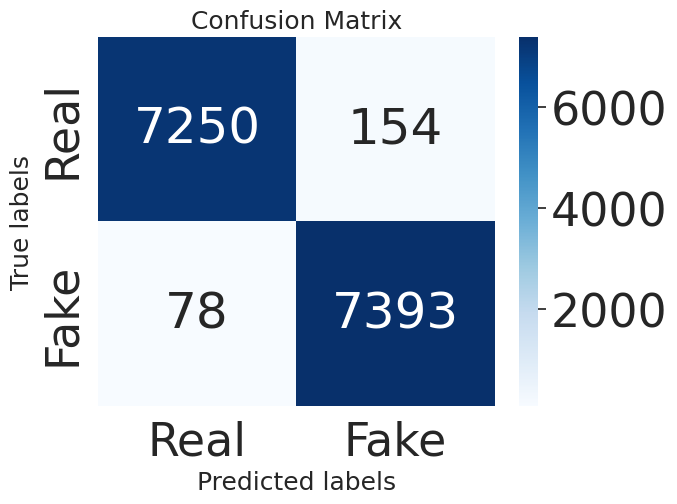



Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      7404
         1.0       0.98      0.99      0.98      7471

    accuracy                           0.98     14875
   macro avg       0.98      0.98      0.98     14875
weighted avg       0.98      0.98      0.98     14875



In [ ]:
bi_lstm = create_model(Bidirectional(LSTM(256)))
train_model(bi_lstm, X_final, y_final)
test_model(bi_lstm,"Bidirectional_LSTM_RNN", X_test, y_test)
save_model(bi_lstm, 'word2vec/bi_lstm_rnn.h5')